# NORTHWIND VERİ SETİ İLE PYTHONDA GÖRSELLEŞTİRME

In [31]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import numpy as np
import pandas.io.sql as sqlio
import psycopg2 as ps
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

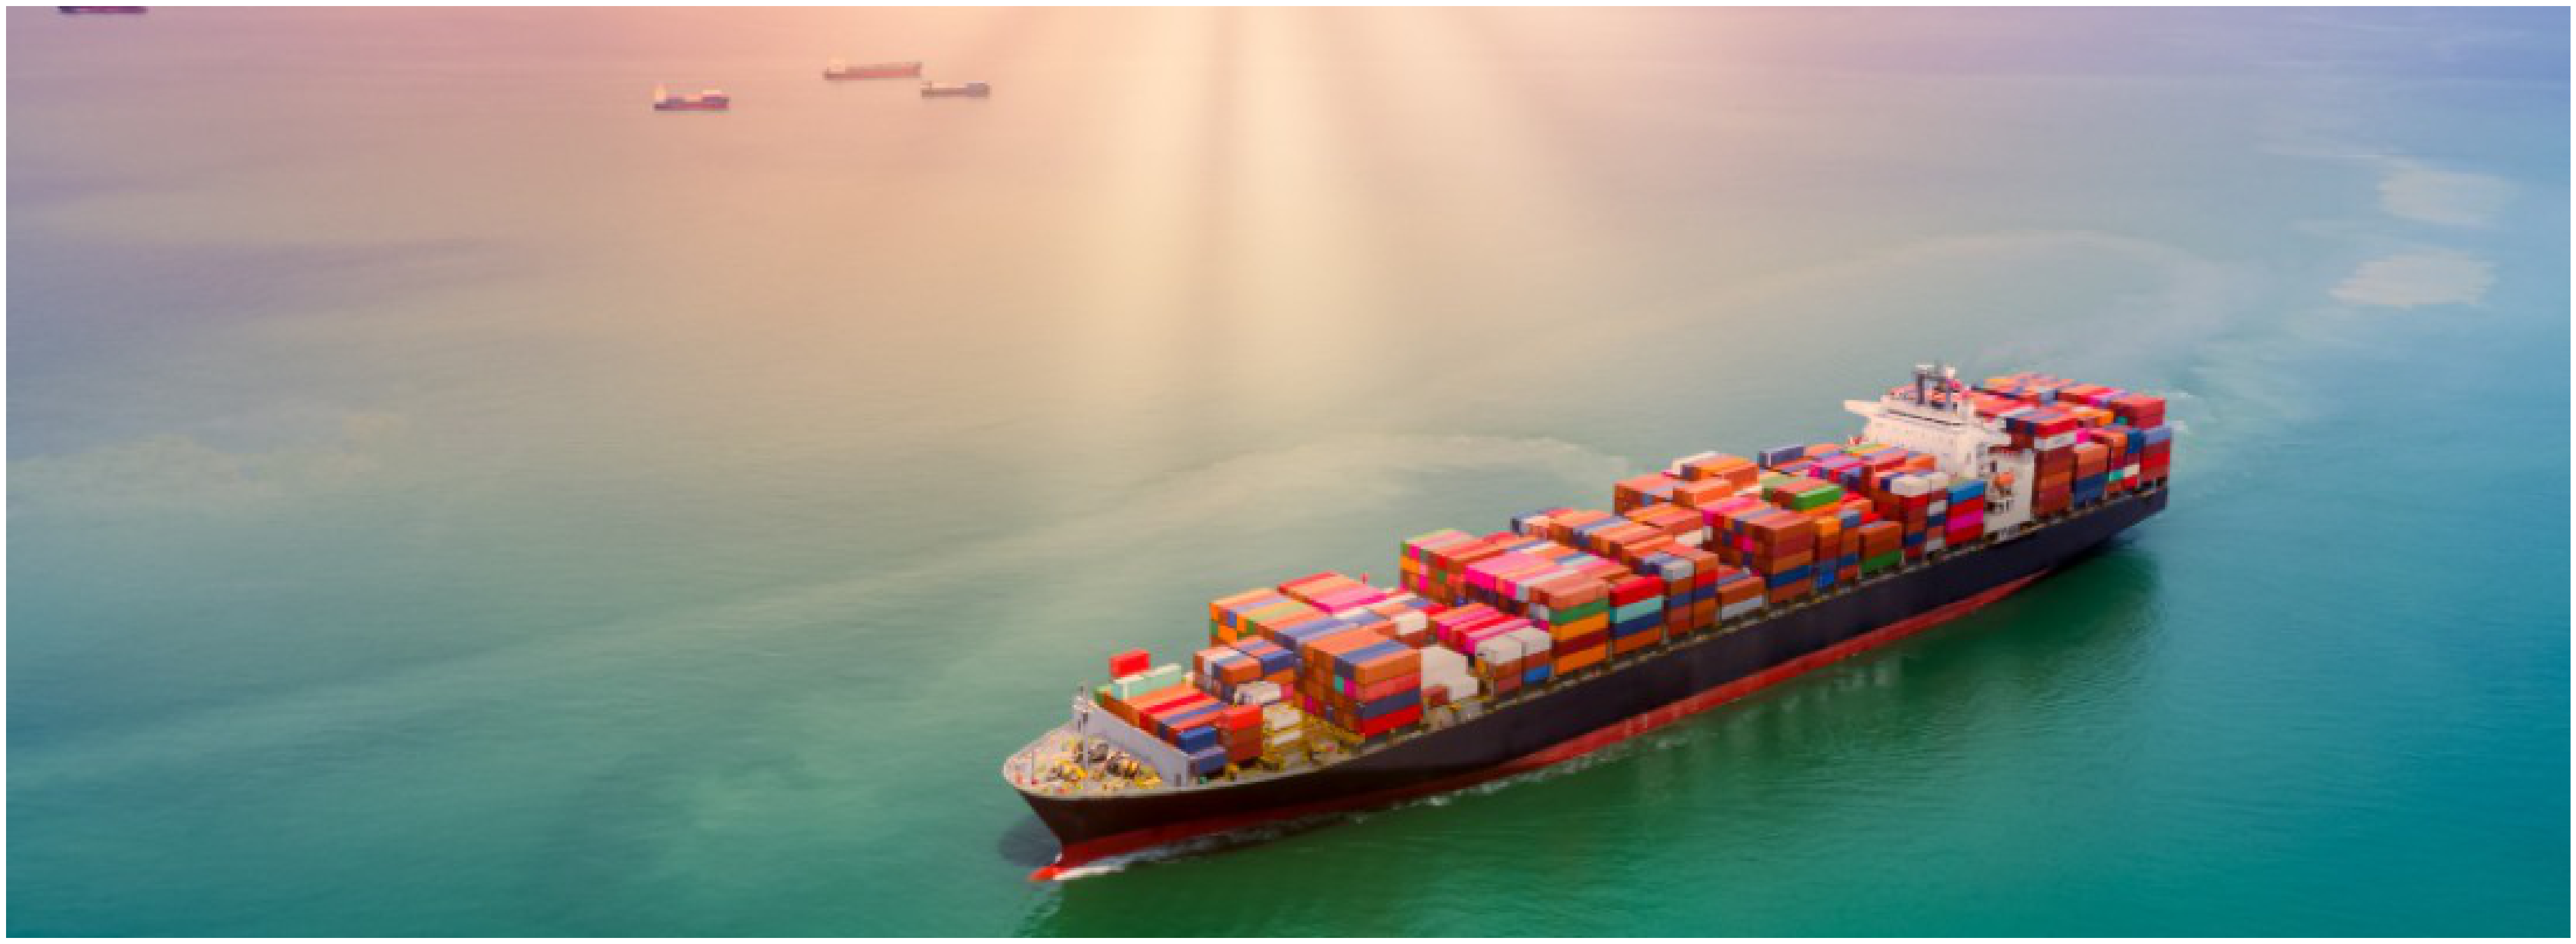

In [38]:
img = mpimg.imread('C:/Users/hasre/Downloads/gemi-tasimaciligi_1.jpg'
)
plt.figure(figsize=(100, 20))
plt.imshow(img)
plt.axis('off') 
plt.show()

In [39]:
conn= ps.connect(dbname="Capstone_Project",
                 user="postgres",
                 password="147258369",
                 port= "5432" )

# 1) Çalışan Performans Analizi

## Northwind şirketindeki çalışanların, elimizde olan verilerin tamamı ile yaptığı satış tutarları ve satış adetleri incelenmiştir.

In [40]:
sql1="""select concat(first_name,' ',last_name)as employee_name, 
count(distinct ord.order_id) as total_order_count, 
round(sum(unit_price * quantity*(1-discount)):: numeric,2) as discounted_total_sales,
round(sum(unit_price * quantity):: numeric,2) as without_discounted_total_sales
from orders as ord
left join order_details odet on ord.order_id=odet.order_id
join employees as e on e.employee_id=ord.employee_id
group by 1
order by 3 desc,2 desc"""

In [36]:
df1=sqlio.read_sql_query(sql1,conn)
df1

C:\Users\hasre\AppData\Local\Temp\ipykernel_20664\3330593753.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1=sqlio.read_sql_query(sql1,conn)


,employee_name,total_order_count,discounted_total_sales,without_discounted_total_sales
0,Margaret Peacock,156,232890.85,250187.45
1,Janet Leverling,127,202812.84,213051.30
2,Nancy Davolio,123,192107.60,202143.71
3,Andrew Fuller,96,166537.76,177749.26
4,Laura Callahan,104,126862.28,133301.03
5,Robert King,72,124568.23,141295.99
6,Anne Dodsworth,43,77308.07,82964.00
7,Michael Suyama,67,73913.13,78198.10
8,Steven Buchanan,42,68792.28,75567.75


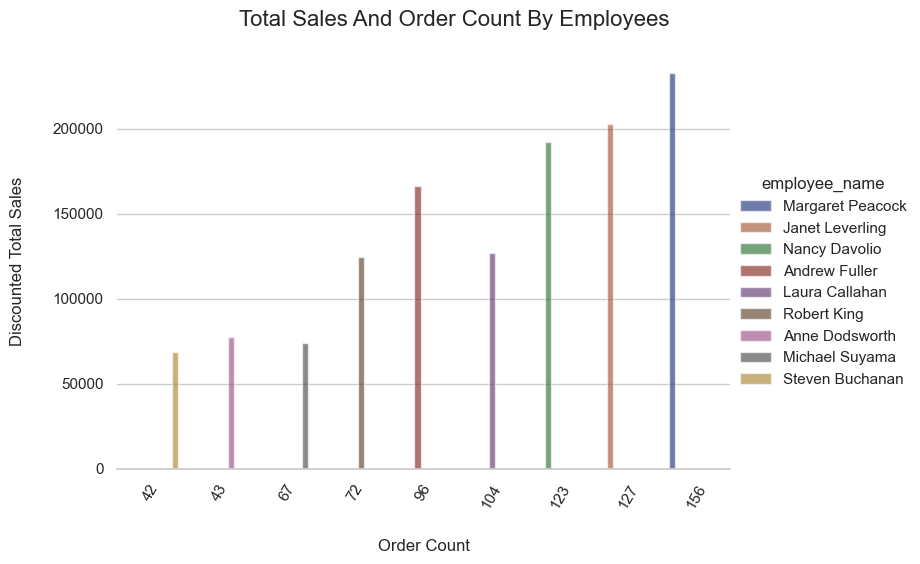

In [6]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df1, 
    kind="bar", 
    x="total_order_count", 
    y="discounted_total_sales", 
    hue="employee_name", 
    palette="dark", 
    alpha=0.6, 
    height=5,
    aspect =1.5)
g.despine(left=True)
g.set_axis_labels("Order Count", "Discounted Total Sales", labelpad=20)
g.fig.suptitle("Total Sales And Order Count By Employees", y=1.05, fontsize=16)
g.set_xticklabels(rotation=60)
plt.show()


## --Örnek Senaryo Analizi

### Çalışanlara 1997 yılındaki gösterdikleri başarı oranında 1998 yıl ortasında maaşlarının belli bir oranında prim verilecektir. Bu prim miktarını belirlemek için kodlar ve görsel oluşturulmuştur.

In [7]:
sql2="""select concat(first_name,' ',last_name)as employee_name, 
count(distinct ord.order_id) as order_count, 
round(sum(unit_price * quantity*(1-discount)):: numeric,2) as total_sales,
case when round(sum(unit_price * quantity*(1-discount)):: numeric,2) >'100000' then 1.30
when round(sum(unit_price * quantity*(1-discount)):: numeric,2)> '60000' and round(sum(unit_price * quantity*(1-discount)):: numeric,2) < '100000' then 1.20
when round(sum(unit_price * quantity*(1-discount)):: numeric,2) <='60000' then 1.10
else '0' end as premium_rate
from orders as ord
left join order_details odet on ord.order_id=odet.order_id
join employees as e on e.employee_id=ord.employee_id
where order_date between '1997-01-01' and '1997-12-31'
group by 1
order by 2 desc  
"""

In [8]:
df2=sqlio.read_sql_query(sql2,conn)
df2

C:\Users\hasre\AppData\Local\Temp\ipykernel_20664\4201016988.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2=sqlio.read_sql_query(sql2,conn)


,employee_name,order_count,total_sales,premium_rate
0,Margaret Peacock,81,128809.79,1.3
1,Janet Leverling,71,108026.16,1.3
2,Nancy Davolio,55,93148.08,1.2
3,Laura Callahan,54,56032.62,1.1
4,Andrew Fuller,41,70444.14,1.2
5,Robert King,36,60471.19,1.2
6,Michael Suyama,33,43126.37,1.1
7,Anne Dodsworth,19,26310.39,1.1
8,Steven Buchanan,18,30716.47,1.1


C:\Users\hasre\AppData\Local\Temp\ipykernel_20664\1228565605.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x="employee_name", y="premium_rate", data=df2, palette="dark", marker="o",color="#DDA0DD",linewidth=2.5)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


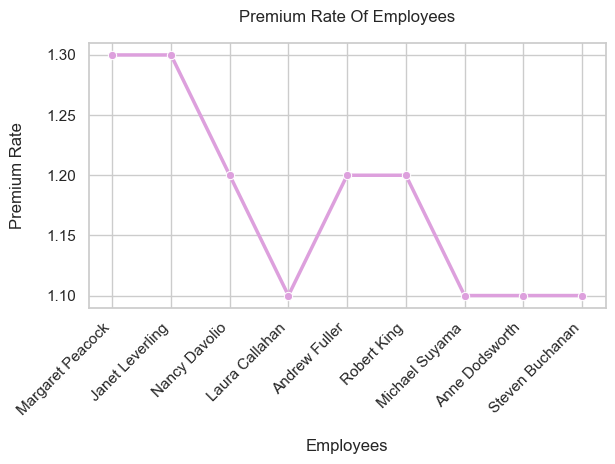

In [9]:
sns.set_style("whitegrid")
ax = sns.lineplot(x="employee_name", y="premium_rate", data=df2, palette="dark", marker="o",color="#DDA0DD",linewidth=2.5)
ax.set_xlabel("Employees", labelpad=15)  
ax.set_ylabel("Premium Rate", labelpad=15)  
ax.set_title('Premium Rate Of Employees', pad=15)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


# 2) Ürün Kategorisi Ve Satış Trendi Analizi

## Ürünlerin kategorilerine göre satışları incelenmiştir.

In [10]:
sql3="""select category_name, 
count(distinct od.order_id) as category_sold_count,
round(sum(od.unit_price * quantity*(1-discount)):: numeric,2) as total_sales
from order_details as od
join products as pr on pr.product_id=od.product_id
join categories as cat on cat.category_id=pr.category_id
group by 1
order by 2 desc, 3 desc
"""

In [11]:
df3=sqlio.read_sql_query(sql3,conn)
df3

C:\Users\hasre\AppData\Local\Temp\ipykernel_20664\251214354.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3=sqlio.read_sql_query(sql3,conn)


,category_name,category_sold_count,total_sales
0,Beverages,354,267868.18
1,Dairy Products,303,234507.28
2,Confections,295,167357.23
3,Seafood,291,131261.74
4,Condiments,193,106047.08
5,Grains/Cereals,182,95744.59
6,Meat/Poultry,161,163022.36
7,Produce,129,99984.58


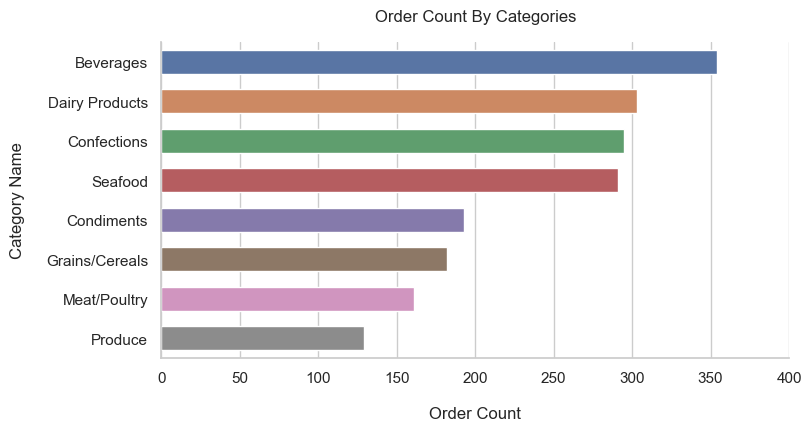

In [12]:
g = sns.catplot(
    data=df3, 
    kind="bar", 
    x='category_sold_count',  
    y='category_name', 
    palette = "deep", 
    aspect=2,  
    height=4,
width=0.6) 
g.ax.set_xlabel('Order Count', labelpad=15)  
g.ax.set_ylabel('Category Name', labelpad=15) 
g.ax.set_title('Order Count By Categories', pad=15)
g.set_xticklabels(rotation=0)
plt.show()


# --Satış Trendi Analizi

### Yılın hangi ayında hangi kategorideki satışların yüksek olduğunun analizi yapılmıştır.

In [13]:
sql4="""select category_name, 
to_char(order_date, 'MM' ) AS months,
count(DISTINCT od.order_id) AS order_count 
from order_details as od
join products as pr on pr.product_id=od.product_id
join categories as cat on cat.category_id=pr.category_id
join orders as o on o.order_id=od.order_id
where to_char(order_date, 'MM' )<='06'
group by 1,2
order by 2, 3 desc"""

In [14]:
df4=sqlio.read_sql_query(sql4,conn)
df4

C:\Users\hasre\AppData\Local\Temp\ipykernel_20664\1700127141.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4=sqlio.read_sql_query(sql4,conn)


,category_name,months,order_count
0,Confections,01,41
1,Beverages,01,38
2,Seafood,01,28
3,Dairy Products,01,28
4,Grains/Cereals,01,22
5,Condiments,01,21
6,Meat/Poultry,01,18
7,Produce,01,11
8,Beverages,02,34
9,Confections,02,33


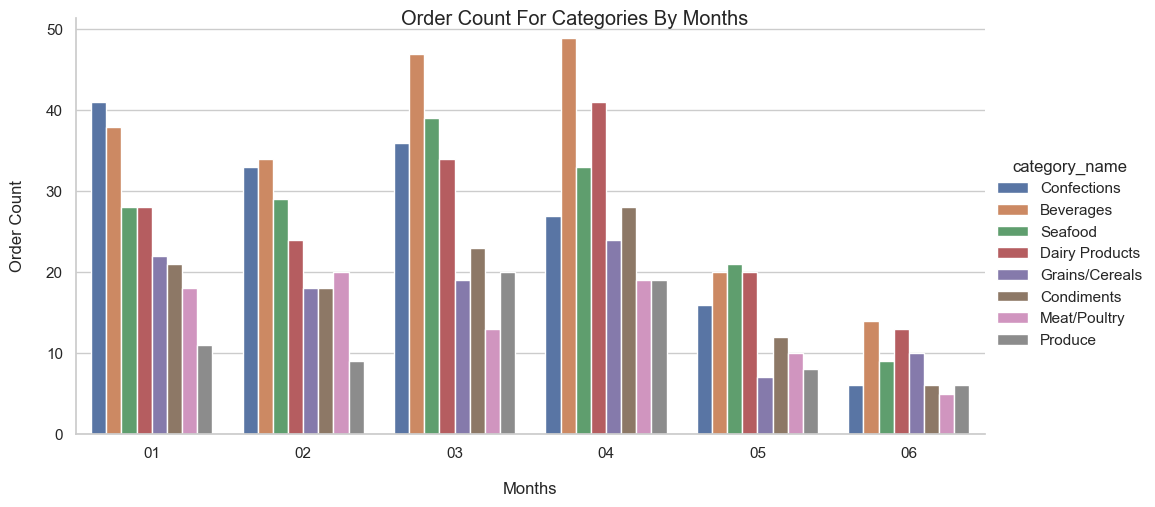

In [15]:
g = sns.catplot(
    data=df4, 
    kind="bar", 
    x='months', 
    y='order_count', 
    hue='category_name', 
    palette = "deep", 
    aspect=2,  
    height=5) 
g.ax.set_xlabel('Months', labelpad=15)  
g.ax.set_ylabel('Order Count', labelpad=15) 
g.fig.suptitle('Order Count For Categories By Months')
g.set_xticklabels(rotation=0)
plt.show()

In [16]:
sql5="""select category_name, 
to_char(order_date, 'MM' ) AS months,
count(DISTINCT od.order_id) AS order_count 
from order_details as od
join products as pr on pr.product_id=od.product_id
join categories as cat on cat.category_id=pr.category_id
join orders as o on o.order_id=od.order_id
where to_char(order_date, 'MM' )>'06'
group by 1,2
order by 2, 3 desc"""

In [17]:
df5=sqlio.read_sql_query(sql5,conn)
df5

C:\Users\hasre\AppData\Local\Temp\ipykernel_20664\2768325543.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5=sqlio.read_sql_query(sql5,conn)


,category_name,months,order_count
0,Beverages,07,25
1,Confections,07,21
2,Dairy Products,07,20
3,Seafood,07,16
4,Condiments,07,15
5,Grains/Cereals,07,12
6,Meat/Poultry,07,9
7,Produce,07,7
8,Beverages,08,27
9,Seafood,08,21


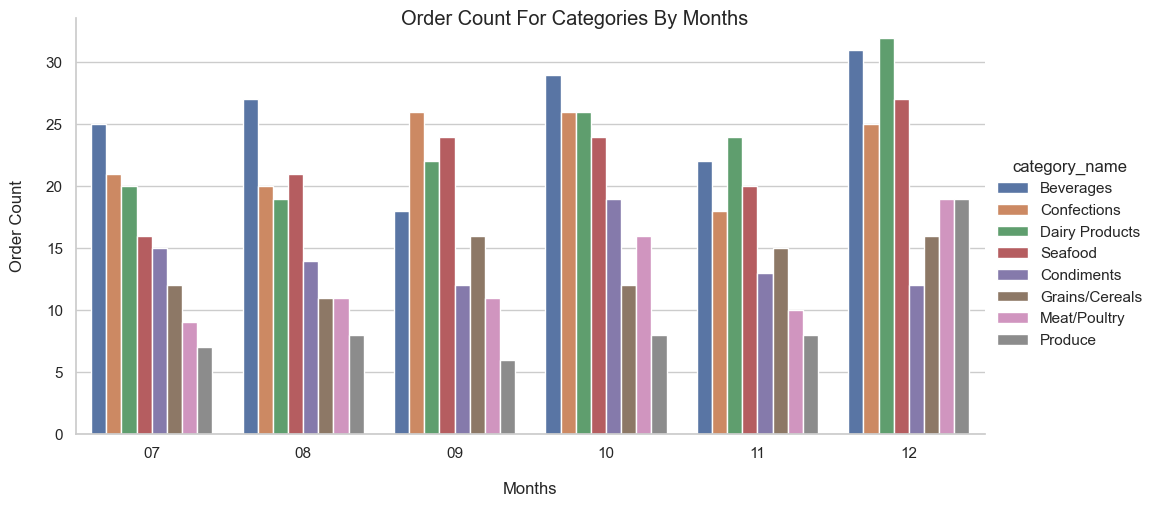

In [18]:
g = sns.catplot(
    data=df5, 
    kind="bar", 
    x='months', 
    y='order_count', 
    hue='category_name', 
    palette = "deep", 
    aspect=2,  
    height=5) 
g.ax.set_xlabel('Months', labelpad=15)  
g.ax.set_ylabel('Order Count', labelpad=15) 
g.fig.suptitle('Order Count For Categories By Months')
g.set_xticklabels(rotation=0)
plt.show()